In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from pathlib import Path

FIG_DIR = Path("figures")
FIG_DIR.mkdir(exist_ok=True)

In [2]:
# Load dataset
df = pd.read_csv("data/candy-data.csv")
fig_dir = Path("figures")
fig_dir.mkdir(exist_ok=True)

display(df.head())

,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


In [ ]:
# Data preprocessing
price_bins = [0.0, 1/3, 2/3, 1.0]
price_labels = ["Low price", "Medium price", "High price"]

df["price_bin"] = pd.cut(
    df["pricepercent"],
    bins=price_bins,
    labels=price_labels,
    include_lowest=True
)

# Popularity tiers (3 equal-sized groups based on winpercent)
tier_labels = ["Low popularity", "Medium popularity", "High popularity"]
df["popularity_tier"] = pd.qcut(
    df["winpercent"],
    q=3,
    labels=tier_labels
)

# Count candies in each popularity tier within each price bin
counts = (
    df.pivot_table(
        index="price_bin",
        columns="popularity_tier",
        values="competitorname",
        aggfunc="count",
        observed=True,
        fill_value=0
    )
    .reindex(price_labels)         # ensure Low/Med/High order
    .reindex(columns=tier_labels)  # ensure tier order
)

x = counts.index.astype(str)

# Mean popularity by price bin
mean_pop = (
    df.groupby("price_bin", observed=True)["winpercent"]
        .mean()
        .reindex(price_labels)
)

In [4]:
# Data preprocessing
# Top 10 candies by win percentage, ordered most to least popular
top10 = (
    df.nlargest(10, "winpercent")
    .sort_values("winpercent", ascending=False)
    .reset_index(drop=True)
)

top10["sugarpct"] = top10["sugarpercent"] * 100
names = top10["competitorname"]
sugar = top10["sugarpct"]

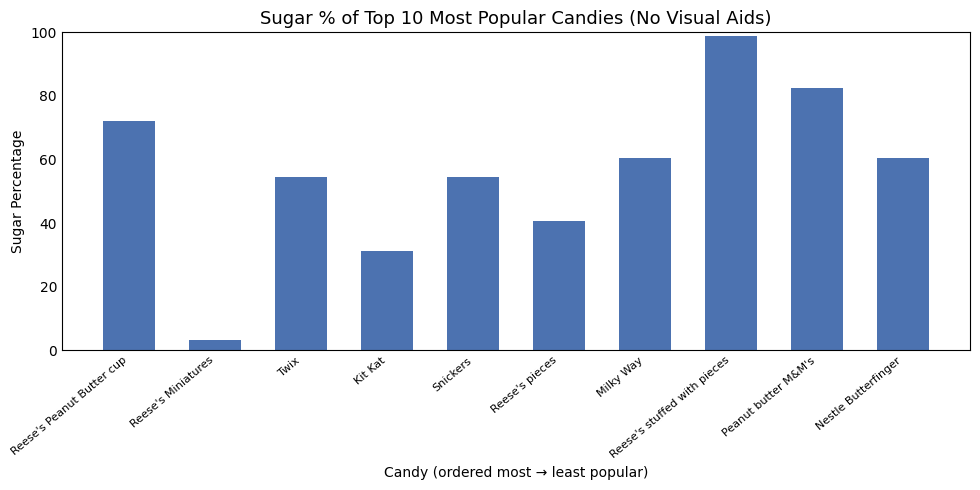

In [5]:
# --------------------
# Figure 1: NO aids (horizontal grid lines)
# --------------------
fig1, ax1 = plt.subplots(figsize=(10, 5))
ax1.bar(names, sugar, color="#4C72B0", width=0.6)
ax1.set_title("Sugar % of Top 10 Most Popular Candies (No Visual Aids)", fontsize=13)
ax1.set_xlabel("Candy (ordered most → least popular)")
ax1.set_ylabel("Sugar Percentage")
ax1.set_ylim(0, 100)
ax1.grid(False)

for spine in ax1.spines.values():
    spine.set_visible(True)
    spine.set_linewidth(0.8)

ax1.tick_params(axis="both", length=0)
# ax1.set_yticklabels([])  # remove numeric scale — forces pure bar-height estimation
plt.xticks(rotation=40, ha="right", fontsize=8)

fig1.tight_layout()
plt.show()
fig1.savefig(FIG_DIR/"Devin-Figure1.png", dpi=150, bbox_inches="tight")
plt.close(fig1)

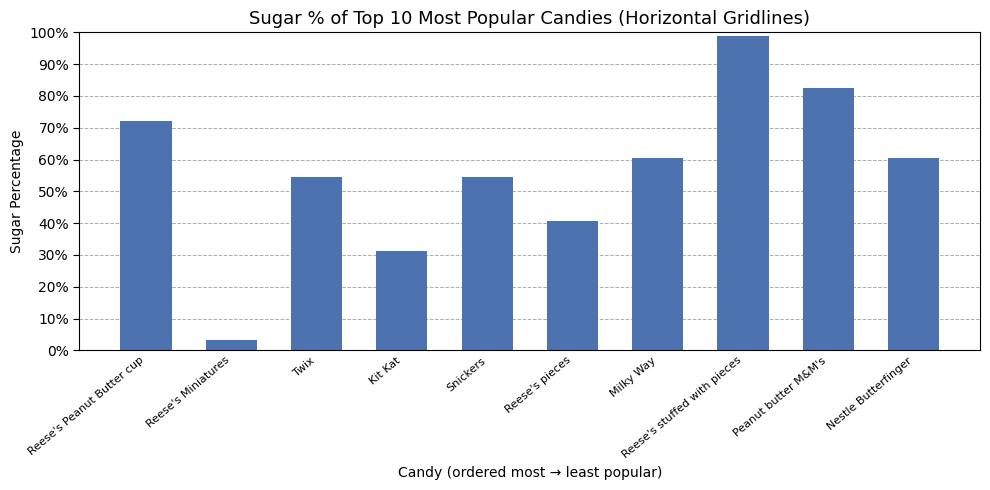

In [6]:
# --------------------
# Figure 2: WITH aids (horizontal grid lines)
# --------------------
fig2, ax2 = plt.subplots(figsize=(10, 5))
ax2.bar(names, sugar, color="#4C72B0", width=0.6)
ax2.set_title("Sugar % of Top 10 Most Popular Candies (Horizontal Gridlines)", fontsize=13)
ax2.set_xlabel("Candy (ordered most → least popular)")
ax2.set_ylabel("Sugar Percentage")
ax2.set_ylim(0, 100)

for spine in ax2.spines.values():
    spine.set_visible(True)
    spine.set_linewidth(0.8)

ax2.set_axisbelow(True)
ax2.yaxis.set_major_locator(ticker.MultipleLocator(10))
ax2.grid(True, which="major", axis="y", linestyle="--", linewidth=0.7, alpha=0.65, color="gray")
ax2.yaxis.set_major_formatter(ticker.FormatStrFormatter("%d%%"))
ax2.tick_params(axis="y", length=4, width=0.8)
ax2.tick_params(axis="x", length=0)
plt.xticks(rotation=40, ha="right", fontsize=8)

fig2.tight_layout()
plt.show()
fig2.savefig(FIG_DIR/"Devin-Figure2.png", dpi=150, bbox_inches="tight")
plt.close(fig2)

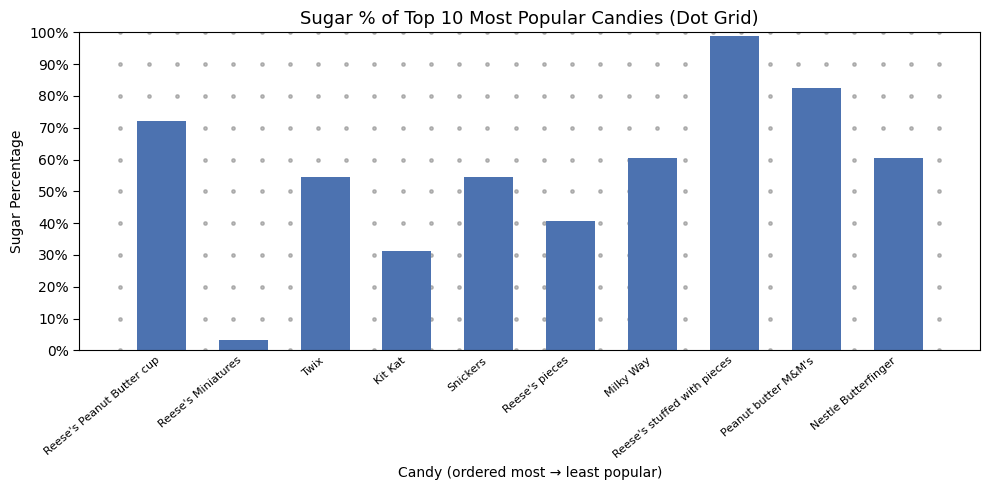

In [7]:
# --------------------
# Figure 3: WITH aids (dot grid)
# --------------------
fig3, ax3 = plt.subplots(figsize=(10, 5))
ax3.bar(names, sugar, color="#4C72B0", width=0.6, zorder=2)
ax3.set_title("Sugar % of Top 10 Most Popular Candies (Dot Grid)", fontsize=13)
ax3.set_xlabel("Candy (ordered most → least popular)")
ax3.set_ylabel("Sugar Percentage")
ax3.set_ylim(0, 100)

# Dot grid: scatter dots at every intersection of x and y grid positions
x_dots = np.linspace(-0.5, 9.5, 30)
y_dots = np.arange(0, 101, 10)
xx, yy = np.meshgrid(x_dots, y_dots)
ax3.scatter(xx.ravel(), yy.ravel(), s=6, color="gray", alpha=0.5, zorder=1)

for spine in ax3.spines.values():
    spine.set_visible(True)
    spine.set_linewidth(0.8)
ax3.yaxis.set_major_locator(ticker.MultipleLocator(10))
ax3.yaxis.set_major_formatter(ticker.FormatStrFormatter("%d%%"))
ax3.tick_params(axis="y", length=4, width=0.8)
ax3.tick_params(axis="x", length=0)
ax3.grid(False)  # dots only — no connecting lines
plt.xticks(rotation=40, ha="right", fontsize=8)

fig3.tight_layout()
plt.show()
fig3.savefig(FIG_DIR/"Devin-Figure3.png", dpi=150, bbox_inches="tight")
plt.close(fig3)